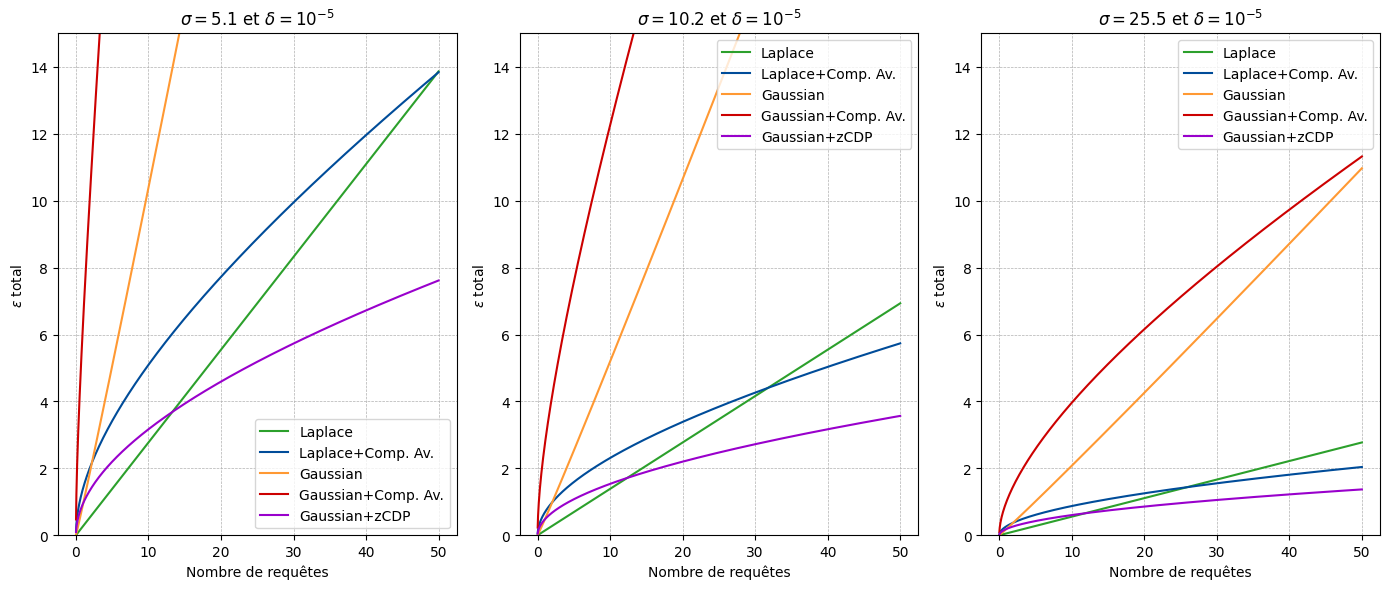

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, laplace

# Paramètres
xs = np.linspace(0.01, 50, 1000)
sigma = [5.1, 10.2, 25.5]
delta_tot = 1e-5
delta_gauss = delta_tot / xs 
delta_gauss_av = delta_tot / (xs + 1)

colors = {
    "laplace": "#2ca02c",       # vert
    "laplace_av": "#004c99",   # bleu foncé
    "gauss": "#ff9933",         # orange
    "gauss_av": "#cc0000",     # rouge
    "gauss_zcdp": "#9900cc",    # violet
}

# Création des graphiques côte à côte
fig, axs = plt.subplots(1, 3, figsize=(14, 6))

for k in range(len(sigma)):

    eps_lap = np.sqrt(2) / sigma[k]
    # Laplace
    eps_tot_lap = xs * eps_lap
    # Laplace Composition Avancée
    eps_tot_lap_av = eps_lap * np.sqrt(2 * xs * np.log(1 / delta_tot)) + xs * eps_lap * (np.exp(eps_lap) - 1)


    eps_gauss = np.sqrt(2 * np.log(1.25 / delta_gauss)) / sigma[k]
    eps_gauss_av = np.sqrt(2 * np.log(1.25 / delta_gauss_av)) / sigma[k]
    # Gaussien
    eps_tot_gauss = xs * eps_gauss
    # Gaussien Composition Avancée
    eps_tot_gauss_av = eps_gauss_av * np.sqrt(2 * xs * np.log(1 / delta_gauss_av)) + xs * eps_gauss_av * (np.exp(eps_gauss_av) - 1)


    rho = 1 / (2 * sigma[k]**2)
    # Gaussien zCDP 
    eps_tot_gauss_zcdp = (xs * rho) + 2 * np.sqrt((xs * rho) * np.log(1 / delta_tot))

    axs[k].plot(xs, eps_tot_lap, label="Laplace", color=colors["laplace"])
    axs[k].plot(xs, eps_tot_lap_av, label="Laplace+Comp. Av.", color=colors["laplace_av"])
    axs[k].plot(xs, eps_tot_gauss, label="Gaussian", color=colors["gauss"])
    axs[k].plot(xs, eps_tot_gauss_av, label="Gaussian+Comp. Av.", color=colors["gauss_av"])
    axs[k].plot(xs, eps_tot_gauss_zcdp, label="Gaussian+zCDP", color=colors["gauss_zcdp"])
    axs[k].set_xlabel('Nombre de requêtes')
    axs[k].set_ylabel(r'$\varepsilon$ total')
    axs[k].set_ylim(0, 15.0)
    axs[k].set_title(rf'$\sigma={sigma[k]}$ et $\delta=10^{{{int(np.log10(delta_tot))}}}$')
    axs[k].legend()
    axs[k].grid(True, linestyle='--', linewidth=0.5)


# Affichage
plt.tight_layout()
plt.show()

In [6]:
import numpy as np
import pandas as pd

# Paramètres
xs = np.array([5, 15, 30])
sigma = [5.1, 10.2, 25.5]
delta_tot = 1e-5
delta_gauss = delta_tot / xs 
delta_gauss_av = delta_tot / (xs + 1)

results = []

for k in range(len(sigma)):

    eps_lap = [np.sqrt(2) / sigma[k]] * len(xs)
    # Laplace
    eps_tot_lap = xs * eps_lap
    # Laplace Composition Avancée
    terme_lin_lap_av = xs * eps_lap * (np.exp(eps_lap) - 1)
    terme_sqrt_lap_av = eps_lap * np.sqrt(2 * xs * np.log(1 / delta_tot))
    eps_tot_lap_av = terme_lin_lap_av + terme_sqrt_lap_av


    eps_gauss = np.sqrt(2 * np.log(1.25 / delta_gauss)) / sigma[k]
    eps_gauss_av = np.sqrt(2 * np.log(1.25 / delta_gauss_av)) / sigma[k]
    # Gaussien
    eps_tot_gauss = xs * eps_gauss
    # Gaussien Composition Avancée
    terme_lin_gauss_av = xs * eps_gauss_av * (np.exp(eps_gauss_av) - 1)
    terme_sqrt_gauss_av = eps_gauss_av * np.sqrt(2 * xs * np.log(1 / delta_gauss_av))
    eps_tot_gauss_av = terme_lin_gauss_av + terme_sqrt_gauss_av


    rho = [1 / (2 * sigma[k]**2)] * len(xs)
    # Gaussien zCDP 
    terme_lin_gauss_zcdp = xs * rho
    terme_sqrt_gauss_zcdp = 2 * np.sqrt((xs * rho) * np.log(1 / delta_tot))
    eps_tot_gauss_zcdp = terme_lin_gauss_zcdp + terme_sqrt_gauss_zcdp

    for i in range(len(xs)):
        results.append({
            'sigma': sigma[k],
            'k': xs[i],
            'eps_lap': eps_lap[i],
            'eps_tot_lap': eps_tot_lap[i],
            'terme_lin_lap_av': terme_lin_lap_av[i],
            'terme_sqrt_lap_av': terme_sqrt_lap_av[i],
            'eps_tot_lap_av': eps_tot_lap_av[i],
            'eps_gauss': eps_gauss[i],
            'eps_tot_gauss': eps_tot_gauss[i],
            'eps_gauss_av': eps_gauss_av[i],
            'terme_lin_gauss_av': terme_lin_gauss_av[i],
            'terme_sqrt_gauss_av': terme_sqrt_gauss_av[i],
            'eps_tot_gauss_av': eps_tot_gauss_av[i],
            'rho': rho[i],
            'terme_lin_gauss_zcdp': terme_lin_gauss_zcdp[i],
            'terme_sqrt_gauss_zcdp': terme_sqrt_gauss_zcdp[i],
            'eps_tot_gauss_zcdp': eps_tot_gauss_zcdp[i]
        })

df = pd.DataFrame(results)

df.round(3)

,sigma,k,eps_lap,eps_tot_lap,terme_lin_lap_av,terme_sqrt_lap_av,eps_tot_lap_av,eps_gauss,eps_tot_gauss,eps_gauss_av,terme_lin_gauss_av,terme_sqrt_gauss_av,eps_tot_gauss_av,rho,terme_lin_gauss_zcdp,terme_sqrt_gauss_zcdp,eps_tot_gauss_zcdp
0,5.1,5,0.277,1.386,0.443,2.975,3.418,1.013,5.065,1.020,9.041,11.764,20.805,0.019,0.096,2.104,2.200
1,5.1,15,0.277,4.159,1.329,5.153,6.483,1.054,15.808,1.056,29.715,21.866,51.580,0.019,0.288,3.644,3.932
2,5.1,30,0.277,8.319,2.658,7.288,9.946,1.079,32.366,1.080,63.013,32.344,95.357,0.019,0.577,5.153,5.730
3,10.2,5,0.139,0.693,0.103,1.488,1.591,0.507,2.533,0.510,1.696,5.882,7.578,0.005,0.024,1.052,1.076
4,10.2,15,0.139,2.080,0.309,2.577,2.886,0.527,7.904,0.528,5.511,10.933,16.444,0.005,0.072,1.822,1.894
5,10.2,30,0.139,4.159,0.619,3.644,4.263,0.539,16.183,0.540,11.600,16.172,27.772,0.005,0.144,2.577,2.721
6,25.5,5,0.055,0.277,0.016,0.595,0.611,0.203,1.013,0.204,0.231,2.353,2.584,0.001,0.004,0.421,0.425
7,25.5,15,0.055,0.832,0.047,1.031,1.078,0.211,3.162,0.211,0.745,4.373,5.119,0.001,0.012,0.729,0.740
8,25.5,30,0.055,1.664,0.095,1.458,1.552,0.216,6.473,0.216,1.562,6.469,8.031,0.001,0.023,1.031,1.054


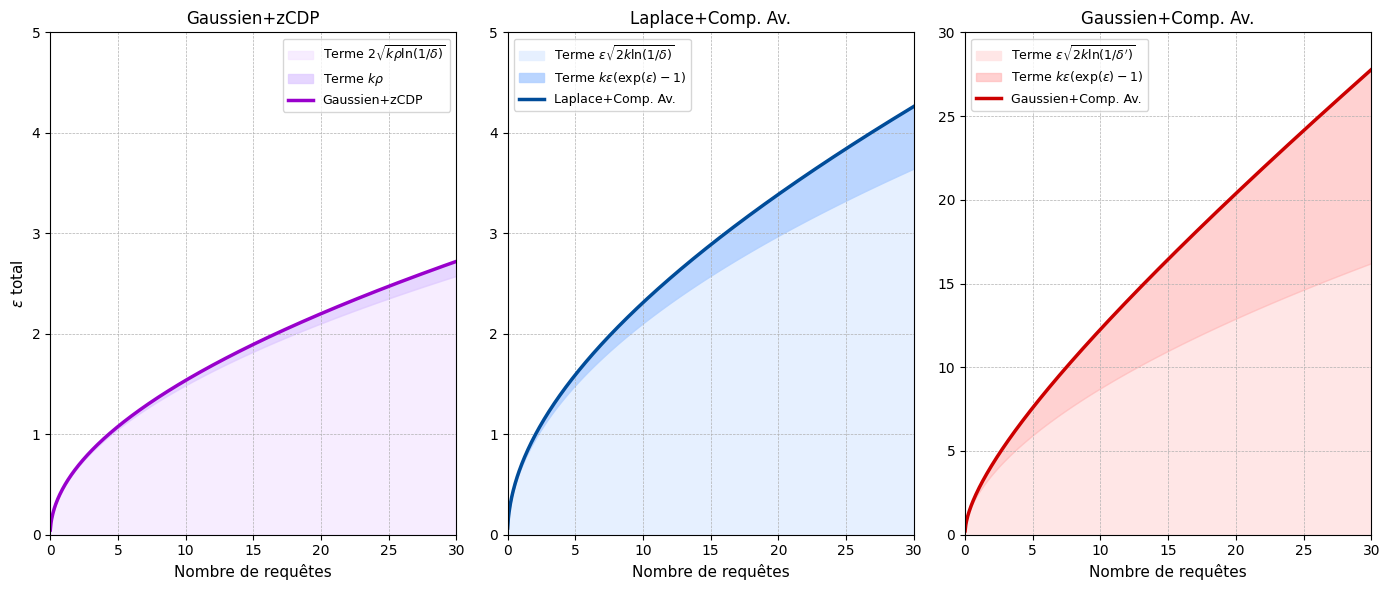

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Paramètres
xs = np.linspace(0.01, 50, 1000)
sigma = 10.2
delta_tot = 1e-5
delta_gauss_av = delta_tot / (xs + 1)

colors = {
    "laplace": "#2ca02c",       # vert
    "laplace_av": "#004c99",   # bleu foncé
    "gauss": "#ff9933",         # orange
    "gauss_av": "#cc0000",     # rouge
    "gauss_zcdp": "#9900cc",    # violet
}

# Gaussien zCDP 
rho = 1 / (2 * sigma**2)
terme_lin_gauss_zcdp = xs * rho
terme_sqrt_gauss_zcdp = 2 * np.sqrt((xs * rho) * np.log(1 / delta_tot))
eps_tot_gauss_zcdp = terme_lin_gauss_zcdp + terme_sqrt_gauss_zcdp

# Laplace Composition Avancée
eps_lap = np.sqrt(2) / sigma
terme_lin_lap_av = xs * eps_lap * (np.exp(eps_lap) - 1)
terme_sqrt_lap_av = eps_lap * np.sqrt(2 * xs * np.log(1 / delta_tot))
eps_tot_lap_av = terme_lin_lap_av + terme_sqrt_lap_av

# Gaussien Composition Avancée
eps_gauss_av = np.sqrt(2 * np.log(1.25 / delta_gauss_av)) / sigma
terme_lin_gauss_av = xs * eps_gauss_av * (np.exp(eps_gauss_av) - 1)
terme_sqrt_gauss_av = eps_gauss_av * np.sqrt(2 * xs * np.log(1 / delta_gauss_av))
eps_tot_gauss_av = terme_lin_gauss_av + terme_sqrt_gauss_av

# === Création des figures ===
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(14, 6))

# === Figure 1 : Gaussian+zCDP ===
ax1.fill_between(xs, 0, terme_sqrt_gauss_zcdp, label=r"Terme $2\sqrt{k\rho\ln(1/\delta)}$", color='#f5e6ff', alpha=0.7)
ax1.fill_between(xs, terme_sqrt_gauss_zcdp, eps_tot_gauss_zcdp, label=r"Terme $k\rho$", color='#e0ccff', alpha=0.8)
ax1.plot(xs, eps_tot_gauss_zcdp, label=r"Gaussien+zCDP", color=colors["gauss_zcdp"], linewidth=2.5)

ax1.set_title(rf"Gaussien+zCDP", fontsize=12)
ax1.set_xlabel("Nombre de requêtes", fontsize=11)
ax1.set_ylabel(r"$\epsilon$ total", fontsize=11)
ax1.set_xlim(0, 30)
ax1.set_ylim(0, 5)
ax1.grid(True, linestyle='--', linewidth=0.5)
ax1.legend(fontsize=9)

# === Figure 2 : Laplace+Comp. Av.===
ax2.fill_between(xs, 0, terme_sqrt_lap_av, label=r"Terme $\epsilon\sqrt{2k\ln(1/\delta)}$", color='#e6f0ff', alpha=1)
ax2.fill_between(xs, terme_sqrt_lap_av, eps_tot_lap_av, label=r"Terme $k\epsilon(\exp(\epsilon)-1)$", color='#b3d1ff', alpha=0.9)
ax2.plot(xs, eps_tot_lap_av, label=r"Laplace+Comp. Av.", color=colors["laplace_av"], linewidth=2.5)

ax2.set_title(rf"Laplace+Comp. Av.", fontsize=12)
ax2.set_xlabel("Nombre de requêtes", fontsize=11)
ax2.set_ylabel(r"", fontsize=11)
ax2.set_xlim(0, 30)
ax2.set_ylim(0, 5)
ax2.grid(True, linestyle='--', linewidth=0.5)
ax2.legend(fontsize=9)

# === Figure 3 : Gaussien+Comp. Av.===
ax3.fill_between(xs, 0, terme_sqrt_gauss_av, label=r"Terme $\epsilon\sqrt{2k\ln(1/\delta')}$", color='#ffe6e6', alpha=1)
ax3.fill_between(xs, terme_sqrt_gauss_av, eps_tot_gauss_av, label=r"Terme $k\epsilon(\exp(\epsilon)-1)$", color='#ffb3b3', alpha=0.6)
ax3.plot(xs, eps_tot_gauss_av, label=r"Gaussien+Comp. Av.", color=colors["gauss_av"], linewidth=2.5)

ax3.set_title(rf"Gaussien+Comp. Av.", fontsize=12)
ax3.set_xlabel("Nombre de requêtes", fontsize=11)
ax3.set_ylabel(r"", fontsize=11)
ax3.set_xlim(0, 30)
ax3.set_ylim(0, 30)
ax3.grid(True, linestyle='--', linewidth=0.5)
ax3.legend(fontsize=9)

plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

# Paramètres
delta = 1e-5
sigma = 10.2
xs = np.linspace(0.1, 100, 10000)

# Préparation de la figure
fig, ax = plt.subplots(figsize=(12, 6))
line, = ax.plot([], [], color="#cc0000", linewidth=2.5, label="Gaussian+Adv. Comp.")
fill1 = fill2 = None

ax.set_xlim(0, 30)
ax.set_ylim(0, 30)
ax.set_xlabel("Nombre de requêtes", fontsize=12)
ax.set_ylabel(r"$\epsilon$ total", fontsize=12)
ax.grid(True, linestyle='--', linewidth=0.5)
ax.legend()
title = ax.set_title("", fontsize=14)

# Initialisation
def init():
    line.set_data([], [])
    return line,

# Animation
def animate(i):
    global fill1, fill2
    ax.clear()
    alpha = i / 50  # variation de 0 à 1
    delta_gauss_adv = alpha * delta / xs
    delta_prime = delta - xs * delta_gauss_adv
    delta_prime = np.maximum(delta_prime, 1e-12)

    gauss_eps_adv = np.sqrt(2 * np.log(1.25 / delta_gauss_adv)) / sigma
    sqrt_term_adv = gauss_eps_adv * np.sqrt(2 * xs * np.log(1 / delta_prime))
    exp_term_adv = xs * gauss_eps_adv * (np.exp(gauss_eps_adv) - 1)
    ys_gauss_adv = sqrt_term_adv + exp_term_adv

    ax.fill_between(xs, 0, sqrt_term_adv, label=r"Terme $\varepsilon\sqrt{2k\log(1/\delta')}$", color='#ffe6e6', alpha=0.6)
    ax.fill_between(xs, sqrt_term_adv, ys_gauss_adv, label=r"Terme $k\epsilon(\exp(\epsilon)-1)$", color='#ffb3b3', alpha=0.6)
    ax.plot(xs, ys_gauss_adv, label=r"Gaussian+Adv. Comp.", color="#cc0000", linewidth=2.5)

    ax.set_ylim(0, 80)
    ax.set_xlim(0, 30)
    ax.set_xlabel("Nombre de requêtes", fontsize=12)
    ax.set_ylabel(r"$\epsilon$ total", fontsize=12)
    ax.grid(True, linestyle='--', linewidth=0.5)
    ax.set_title(rf"Décomposition – Allocation $\delta' = {alpha:.2f} \cdot \delta / k$", fontsize=14)
    ax.legend(fontsize=10)
    return ax.collections + ax.lines

# Création et affichage de l'animation dans le notebook
anim = animation.FuncAnimation(fig, animate, frames=51, init_func=init, blit=False, interval=100)
plt.close(fig)
HTML(anim.to_jshtml())

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# === Couleurs par sigma ===
colors = {
    5.1: "#d73027",     # rouge
    10.2: "#4575b4",    # bleu
    25.5: "#1a9850",    # vert
}

# Paramètres
delta = 1e-5
xs = np.linspace(0.1, 100, 1000)
sigmas = [5.1, 10.2, 25.5]

# === Fonctions de calcul ===

def ratio_zcdp(sigma):
    rho = 1 / (2 * sigma**2)
    sqrt_term = 2 * np.sqrt(xs * rho * np.log(1 / delta))
    linear_term = xs * rho
    total = sqrt_term + linear_term
    return 100*sqrt_term / total

def ratio_laplace_adv(sigma):
    eps = np.sqrt(2) / sigma
    sqrt_term = eps * np.sqrt(2 * xs * np.log(1 / delta))
    exp_term = xs * eps * (np.exp(eps) - 1)
    total = sqrt_term + exp_term
    return 100*sqrt_term / total

def ratio_gauss_adv(sigma):
    delta_gauss_adv = delta / (xs + 1)
    eps = np.sqrt(2 * np.log(1.25 / delta_gauss_adv)) / sigma
    sqrt_term = eps * np.sqrt(2 * xs * np.log(1 / delta_gauss_adv))
    exp_term = xs * eps * (np.exp(eps) - 1)
    total = sqrt_term + exp_term
    return 100*sqrt_term / total

# === Plot ===

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(14, 6))

# 1. zCDP
for sigma in sigmas:
    ax1.plot(xs, ratio_zcdp(sigma), color=colors[sigma], label=rf"$\sigma={sigma}$", linewidth=2)
ax1.set_title(rf"Gaussian+zCDP ($\delta=10^{{{int(np.log10(delta))}}}$)")
ax1.set_xlabel("Nombre de requêtes")
ax1.set_ylabel("Contribution du terme en racine carrée dans le budget total en %")
ax1.set_ylim(0, 100)
ax1.grid(True, linestyle="--", linewidth=0.5)
ax1.legend(fontsize=9)

# 2. Laplace Adv
for sigma in sigmas:
    ax2.plot(xs, ratio_laplace_adv(sigma), color=colors[sigma], label=rf"$\sigma={sigma}$", linewidth=2)
ax2.set_title(rf"Laplace+Adv. Comp. ($\delta=10^{{{int(np.log10(delta))}}}$)")
ax2.set_xlabel("Nombre de requêtes")
ax2.set_ylabel("")
ax2.set_ylim(0, 100)
ax2.grid(True, linestyle="--", linewidth=0.5)
ax2.legend(fontsize=9)

# 3. Gaussian Adv
for sigma in sigmas:
    ax3.plot(xs, ratio_gauss_adv(sigma), color=colors[sigma], label=rf"$\sigma={sigma}$", linewidth=2)
ax3.set_title(rf"Gaussian+Adv. Comp. ($\delta=10^{{{int(np.log10(delta))}}}$)")
ax3.set_xlabel("Nombre de requêtes")
ax3.set_ylabel("")
ax3.set_ylim(0, 100)
ax3.grid(True, linestyle="--", linewidth=0.5)
ax3.legend(fontsize=9)

plt.tight_layout()
plt.show()

In [ ]:
# Plage de valeurs pour delta (échelle logarithmique)
delta_values = np.logspace(-10, -2, 100)

# Définition des écarts types
sigma_1 = 5.1
sigma_2 = 10.2
sigma_3 = 25.5

colors = {
    5.1: "#d73027",     # rouge
    10.2: "#4575b4",    # bleu
    25.5: "#1a9850",    # vert
}

# Calcul de rho en fonction de sigma
rho_1 = 1 / (2 * sigma_1**2)
rho_2 = 1 / (2 * sigma_2**2)
rho_3 = 1 / (2 * sigma_3**2)

# Calcul de epsilon avec la formule avancée
epsilon_values_1 = rho_1 + np.sqrt(4 * rho_1 * np.log(1 / delta_values))
epsilon_values_2 = rho_2 + np.sqrt(4 * rho_2 * np.log(1 / delta_values))
epsilon_values_3 = rho_3 + np.sqrt(4 * rho_3 * np.log(1 / delta_values))

# Création du graphique
plt.figure(figsize=(8, 6))

# Tracé des courbes pour sigma_1, sigma_2 et rho_3
plt.plot(delta_values, epsilon_values_1, color=colors[sigma_1], label=rf'$\rho = {rho_1:.4f} \Rightarrow \sigma_ = {sigma_1:.1f}$')
plt.plot(delta_values, epsilon_values_2, color=colors[sigma_2], label=rf'$\rho = {rho_2:.4f} \Rightarrow \sigma = {sigma_2:.1f} $')
plt.plot(delta_values, epsilon_values_3, color=colors[sigma_3], label=rf'$\rho = {rho_3:.4f} \Rightarrow \sigma = {sigma_3:.1f}$')

# Personnalisation du graphique
plt.xscale("log")
plt.ylim(0, 1.5)
plt.xlabel(r'$\delta$', fontsize=12)
plt.ylabel(r'$\varepsilon$', fontsize=12)
plt.title(r'Conversion de $\rho$ en ($\varepsilon, \delta$) via $\varepsilon = \rho + 2\sqrt{\rho \ln(1/\delta)}$', fontsize=14)
plt.legend()
plt.grid(True, linestyle='--', linewidth=0.5)

# Affichage du graphique
plt.show()

In [ ]:
from scipy.stats import norm, laplace
import numpy as np

# Paramètres de la loi normale
mu = 0  # Espérance nulle
sigma_values = [5.1, 10.2, 25.5]

for sigma in sigma_values:
    # Calcul des bornes de l'intervalle de confiance à 95%
    lower_bound, upper_bound = norm.ppf([0.025, 0.975], mu, sigma)
    
    # Calcul de la taille de l'intervalle
    interval_size = upper_bound - lower_bound
    print(f"Taille de l'intervalle de confiance à 95% pour sigma = {sigma}: {interval_size}")

    # Paramètre b pour la loi de Laplace (b = sigma / sqrt(2))
    b = sigma / np.sqrt(2)
    
    # Calcul des bornes de l'intervalle de confiance à 95% pour la distribution Laplace
    lower_bound_laplace, upper_bound_laplace = laplace.ppf([0.025, 0.975], loc=mu, scale=b)
    
    # Calcul de la taille de l'intervalle de confiance
    interval_size_laplace = upper_bound_laplace - lower_bound_laplace
    print(f"Taille de l'intervalle de confiance à 95% pour Laplacien avec sigma = {sigma}: {interval_size_laplace}")

In [ ]:
# Plage de valeurs pour epsilon
eps = np.linspace(0.05, 1, 200)

# Calcul des valeurs de sigma
sigma_values = np.sqrt(2) / eps

# Définition de sigma = 10 et calcul de epsilon correspondant
sigma_target = 10
epsilon_target = np.sqrt(2) / sigma_target

# Création du graphique
plt.figure(figsize=(8, 6))
plt.plot(eps, sigma_values, label=r'$\sigma = \frac{\sqrt{2}}{\varepsilon}$')

# Ajout d'une ligne horizontale pour sigma = 10
plt.axhline(y=sigma_target, color='r', linestyle='--', label=r'$\sigma = 10$')

# Mise en évidence du point correspondant sur la courbe
plt.scatter(epsilon_target, sigma_target, color='red', zorder=3)
plt.annotate(
    f'({epsilon_target:.2f}, {sigma_target})', 
    xy=(epsilon_target, sigma_target),
    xytext=(-40,10), textcoords='offset points',
    arrowprops=dict(arrowstyle="->", lw=1.5),
    fontsize=12, color='red'
)

# Personnalisation du graphique
plt.xlabel(r'$\varepsilon$', fontsize=12)
plt.ylabel(r'$\sigma$', fontsize=12)
plt.title(r'Courbe de $\sigma = \frac{\sqrt{2}}{\varepsilon}$ pour un Laplacien', fontsize=14)
plt.legend()
plt.grid(True, linestyle='--', linewidth=0.5)

# Affichage du graphique
plt.show()

In [ ]:
# Plage de valeurs pour epsilon
rho = np.linspace(0.0005, 0.02, 1000)

# Calcul des valeurs de sigma
sigma_values_laplace = 1 / np.sqrt(rho)

sigma_values_gauss = 1 / np.sqrt(2*rho)

# Définition de sigma = 10 et calcul de epsilon correspondant
sigma_target = 10
rho_target_laplace = 1 / sigma_target**2
rho_target_gauss = 1 / (2* sigma_target**2)

# Création du graphique
plt.figure(figsize=(8, 6))
plt.plot(rho, sigma_values_laplace, label=r'$ Laplace : \sigma = \frac{1}{\sqrt{\rho}}$')
plt.plot(rho, sigma_values_gauss, label=r'$ Gauss : \sigma = \frac{1}{\sqrt{2\rho}}$')

# Ajout d'une ligne horizontale pour sigma = 10
plt.axhline(y=sigma_target, color='r', linestyle='--', label=r'$\sigma = 10$')

# Mise en évidence du point correspondant sur la courbe
plt.scatter(rho_target_laplace, sigma_target, color='red', zorder=3)
plt.annotate(
    f'({rho_target_laplace:.3f}, {sigma_target})', 
    xy=(rho_target_laplace, sigma_target),
    xytext=(-40,10), textcoords='offset points',
    arrowprops=dict(arrowstyle="->", lw=1.5),
    fontsize=12, color='red'
)

plt.scatter(rho_target_gauss, sigma_target, color='red', zorder=3)
plt.annotate(
    f'({rho_target_gauss:.3f}, {sigma_target})', 
    xy=(rho_target_gauss, sigma_target),
    xytext=(-40,10), textcoords='offset points',
    arrowprops=dict(arrowstyle="->", lw=1.5),
    fontsize=12, color='red'
)


# Personnalisation du graphique
plt.xlabel(r'$\rho$', fontsize=12)
plt.ylabel(r'$\sigma$', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', linewidth=0.5)

# Affichage du graphique
plt.show()